#PRIMERO IMPORTAMOS LAS LIBRERIAS NECESARIAS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Aca hacemos la configuración general y cargamos los datasets

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

train = pd.read_csv('../data/processed/train_clean_basic.csv')
test = pd.read_csv('../data/processed/test_clean_basic.csv')
gender = pd.read_csv('../data/raw/gender_submission.csv')

print("Tamaño del dataset de entrenamiento:", train.shape)
print("Tamaño del dataset de prueba:", test.shape)
print("Tamaño del dataset gender:", gender.shape)

Tamaño del dataset de entrenamiento: (891, 12)
Tamaño del dataset de prueba: (418, 11)
Tamaño del dataset gender: (418, 2)


Acá vamos a mostrar la información de los datos preliminares que tenemos

In [7]:
train.head()

train.info()

train.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Analizamos los valores nulos que hay por columna

In [ ]:
null_counts = train.isnull().sum().sort_values(ascending=False)
null_counts[null_counts > 0]


Cabin       687
Age         177
Embarked      2
dtype: int64

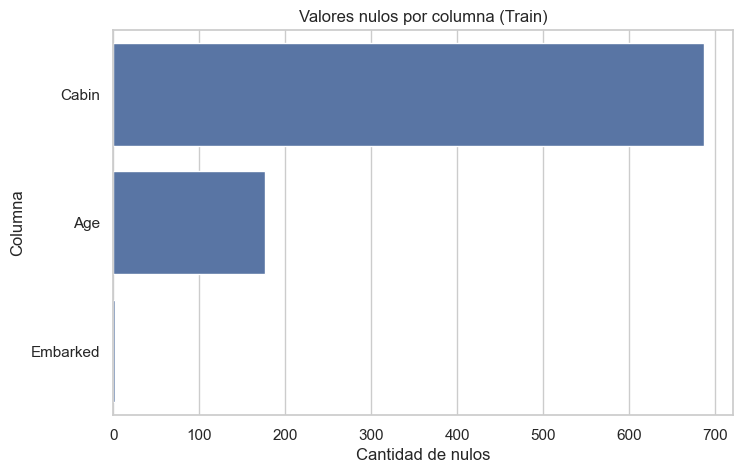

In [ ]:
sns.barplot(x=null_counts[null_counts > 0], y=null_counts[null_counts > 0].index)
plt.title("Valores nulos por columna (Train)")
plt.xlabel("Cantidad de nulos")
plt.ylabel("Columna")
plt.savefig('../results/valores_nulos.png', dpi=300, bbox_inches='tight')
plt.show()

Esta gráfica muestra la distribución de supervivencia

C:\Users\jairo\AppData\Local\Temp\ipykernel_34004\2674426140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='Set2')


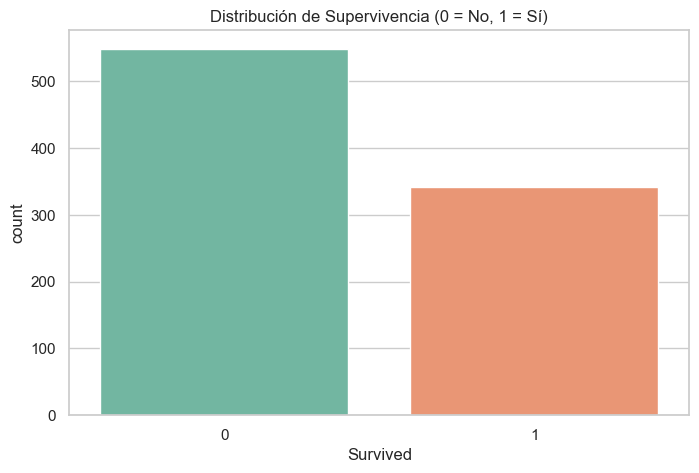

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [ ]:
sns.countplot(x='Survived', data=train, palette='Set2')
plt.title('Distribución de Supervivencia (0 = No, 1 = Sí)')
plt.savefig('../results/distribucion_supervivencia.png')
plt.show()

train['Survived'].value_counts(normalize=True)

Acá es un gráfico de barras sobre la Supervivencia por género y clase

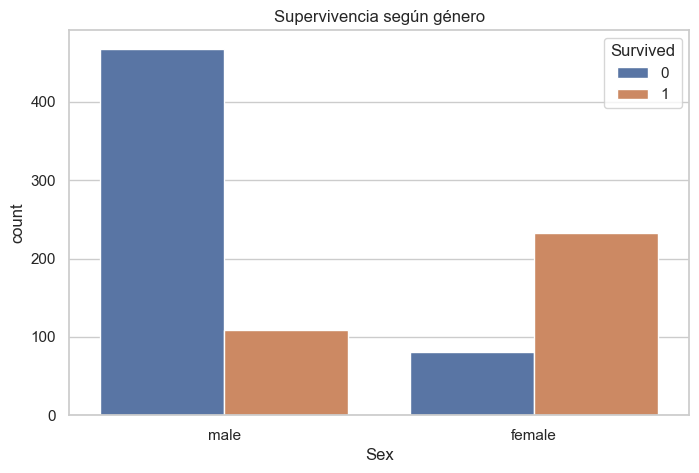

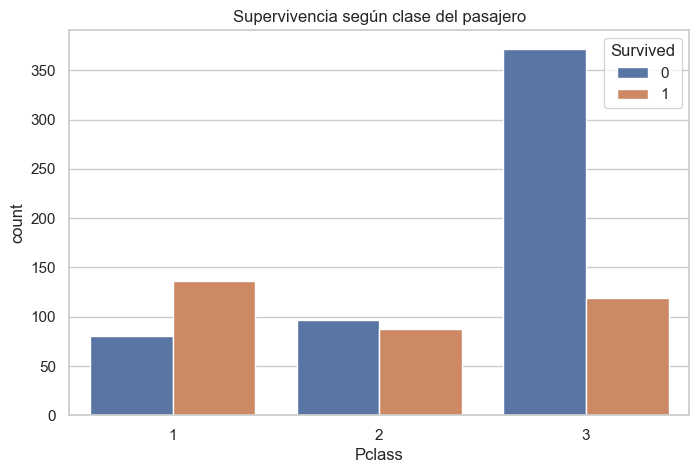

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Supervivencia según género')
plt.savefig('../results/supervivencia_genero.png')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Supervivencia según clase del pasajero')
plt.savefig('../results/supervivencia_clase_pasajero.png')
plt.show()


FINALMENTE LA DISTRIBUCIÓN POR EDADES y LAS CORRELACIONES NUMÉRICAS

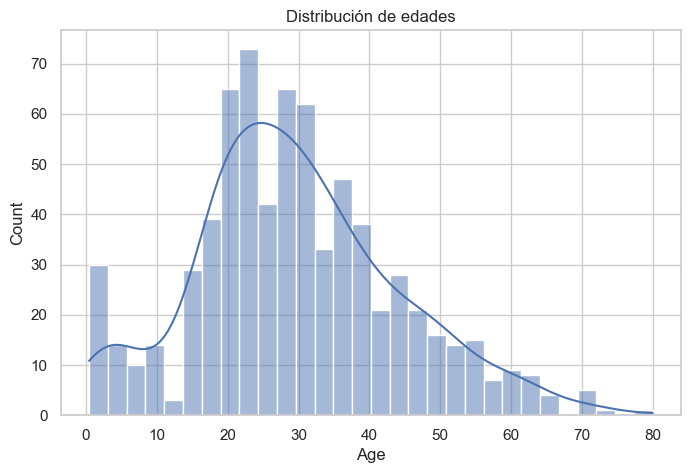

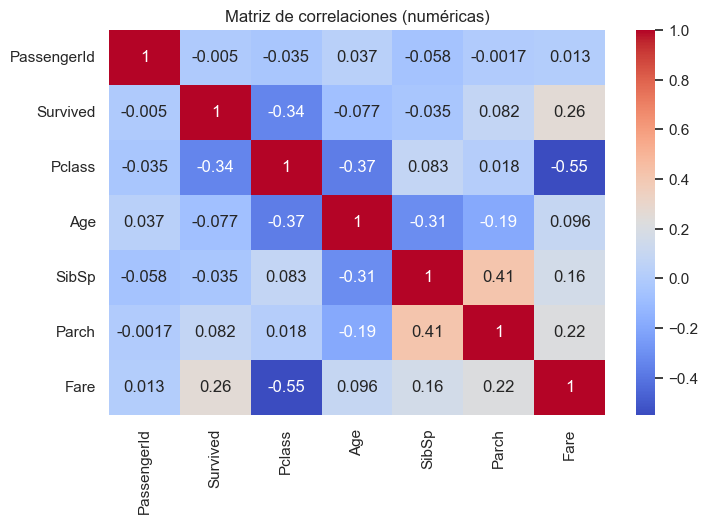

In [ ]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de edades')
plt.savefig('../results/distribucion_edades.png')
plt.show()

#----

corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaciones (numéricas)')
plt.savefig('../results/matriz_correlaciones.png')
plt.show()

GUARDAMOS LOS RESULTADOS EN LA CARPETA RESULTS

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Supervivencia según género')
plt.savefig('../results/sobrevivientes_por_genero.png')
